In [1]:
from faker import Faker
import random
import pandas as pd
from random import randrange
from datetime import datetime
import numpy as np

In [2]:
nr_of_trekkers = 10000
# time-stamp
# email, name, height, weight, age, gender, city, locality
# languages, college
# working profession, have you gone trekking
# preference of trek days
# no. of previous treks
# list of treks done
# difficulty of trek
# preferred location of trek
# food preferences

fake = Faker('de_DE')

trekkers = []

In [3]:
# generate a list of ages between 18 and 80 years old, with 1000 entries following a normal distribution
ages = np.random.normal(30, 10, nr_of_trekkers).astype(int)
# generate a list of number of previous treks between 0 and 10, with 1000 entries following a normal distribution
previous_treks = np.random.normal(3, 1, nr_of_trekkers).astype(int)

localities = {
    "Pune":  [
        "Kothrud", "Nal Stop", "Aundh", "Pimpri", "Shivaji Nagar"
    ], # list of localities random 
    "Mumbai": [
        "Bandra", "Andheri", "Borivali", "Ghatkopar", "Kandivali"
    ],
    "Nashik": [
        "Satpur", "Ambad", "Panchavati", "Sadar", "Gangapur"
    ],
    "Kolhapur": [
        "Kagal", "Tarabai Park", "Kasaba Bawada", "D Ward", "Gadhinglaj"
    ],
    "Nagpur": [
        "Kamptee", "Bank Colony", "Kalameshwar", "Reshim Bagh", "Koradi Road"
    ]
}

for customers_id in range(nr_of_trekkers):
    # creating time-stamp:
    d1 = datetime.strptime(f'1/1/2021', '%m/%d/%Y')
    d2 = datetime.strptime(f'12/31/2022', '%m/%d/%Y')
    transaction_date = fake.date_between(d1, d2)
    # create email:
    email = fake.ascii_email()
    # create trekkers name:
    name = fake.name()

    # create height:
    height = fake.random_int(160, 199)
    # create weight:
    weight = fake.random_int(50, 110)

    # create age:
    age = ages[customers_id]
    if age < 10:
        age = 30-age
    
    # create gender:
    gender = random.choice(["M", "F", "None"])
    # create city:
    city = random.choice(["Pune", "Mumbai", "Nashik", "Kolhapur", "Nagpur"])
    # create locality:

    locality = random.choice(localities[city])

    # choose max 3 min 1 languages
    languages = random.sample(["English", "Hindi", "Marathi", "Gujarati", "Bengali","Urdu"], k=random.randint(1, 3))
    # create college:
    college = random.choice(["MIT-WPU", "SPPU", "MIT-ADT", "PCCOE", "PICT", "VIT"])
    # create profession:
    profession = random.choice(["Student", "Engineer", "Doctor", "Lawyer", "Teacher", "Businessman", "Farmer","Entrepreneur", "Company Exectuive","Other"])
    # create YES/NO:
    # create preference of trek days:
    gone_trekking = random.choice(["Y", "N"])
    if gone_trekking == "Y":
        num_treks = previous_treks[customers_id]
    else:
        num_treks = 0

    # preference of trek days monday to sunday, min 1 max 7
    preferred_days = random.sample(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], k=random.randint(1, 7))
    # list of treks done:
   # prev_treks = random.choice()
    # difficulty of treks:
    difficulty_trek = random.choice(["Beginner", "Intermediate", "Experienced"])
    # preferred location of treks:

    # food choice:
    food_choice = random.choice(["Non-Veg", "Veg", "Vegan"])


    trekkers.append([email, name, height, weight,age, gender, city, locality, languages, college, profession,
                     gone_trekking, preferred_days, num_treks, difficulty_trek])




In [4]:

trekkers_df = pd.DataFrame(trekkers, columns=['Email-ID', 'Name', 'Height', 'Weight', 'Age', 'Gender', 'City', 'Locality',
                                               'Languages', 'college', 'Profession', 'Have you gone Trekking', 'Preferred Days',
                                               'Number of Treks', 'Difficulty of Trek'])

pd.pandas.set_option('display.max_columns', None)
print(trekkers_df)

                             Email-ID                        Name  Height  \
0               lilianelangern@gmx.de             Violetta Täsche     178   
1                schmidtramona@aol.de    Herr Hans-Albert Mangold     167   
2             benediktadler@gmail.com            Martha Kuhl B.A.     164   
3                    zkade@hotmail.de         Erich Sorgatz B.Sc.     172   
4           bonbachraphaela@klemt.com            Karl-Otto Dippel     196   
...                               ...                         ...     ...   
9995  hermann-joseffischer@eberth.org  Frau Annamaria Gnatz B.Sc.     166   
9996            jolanda92@soeding.com         Hans-Willi Eckbauer     187   
9997               nlinke@zorbach.org         Ottokar Seidel-Baum     172   
9998             gkoch-ii@schleich.de           Dr. Klaus Ullmann     181   
9999               kadelucia@wulf.net                 Alida Tröst     176   

      Weight  Age Gender    City     Locality               Languages colle

<AxesSubplot:>

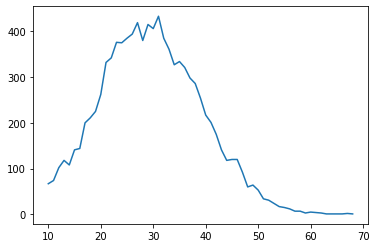

In [5]:
trekkers_df["Age"].value_counts().sort_index().plot(kind="line")

In [6]:
trekkers_df.describe()

,Height,Weight,Age,Number of Treks
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,179.615500,80.240000,29.721900,1.262200
std,11.545856,17.531621,9.359355,1.453706
min,160.000000,50.000000,10.000000,0.000000
25%,170.000000,65.000000,23.000000,0.000000
50%,180.000000,80.000000,29.000000,0.000000
75%,190.000000,95.000000,36.000000,2.000000
max,199.000000,110.000000,68.000000,6.000000


In [7]:
trekkers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Email-ID                10000 non-null  object
 1   Name                    10000 non-null  object
 2   Height                  10000 non-null  int64 
 3   Weight                  10000 non-null  int64 
 4   Age                     10000 non-null  int64 
 5   Gender                  10000 non-null  object
 6   City                    10000 non-null  object
 7   Locality                10000 non-null  object
 8   Languages               10000 non-null  object
 9   college                 10000 non-null  object
 10  Profession              10000 non-null  object
 11  Have you gone Trekking  10000 non-null  object
 12  Preferred Days          10000 non-null  object
 13  Number of Treks         10000 non-null  int64 
 14  Difficulty of Trek      10000 non-null  object
dtypes: 

In [8]:
trekkers_df.to_csv('../Data/trekkers_df.csv', index=False)